In [1]:
pip install pymannkendall

In [2]:
import numpy as np
import pandas as pd

In [3]:
pip install dash plotly pandas numpy statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.1
    Uninstalling Flask-3.1.1:
      Successfully uninstalled Flask-3.1.1


In [4]:
pip install pandas pymannkendall

In [5]:
pip install imdlib

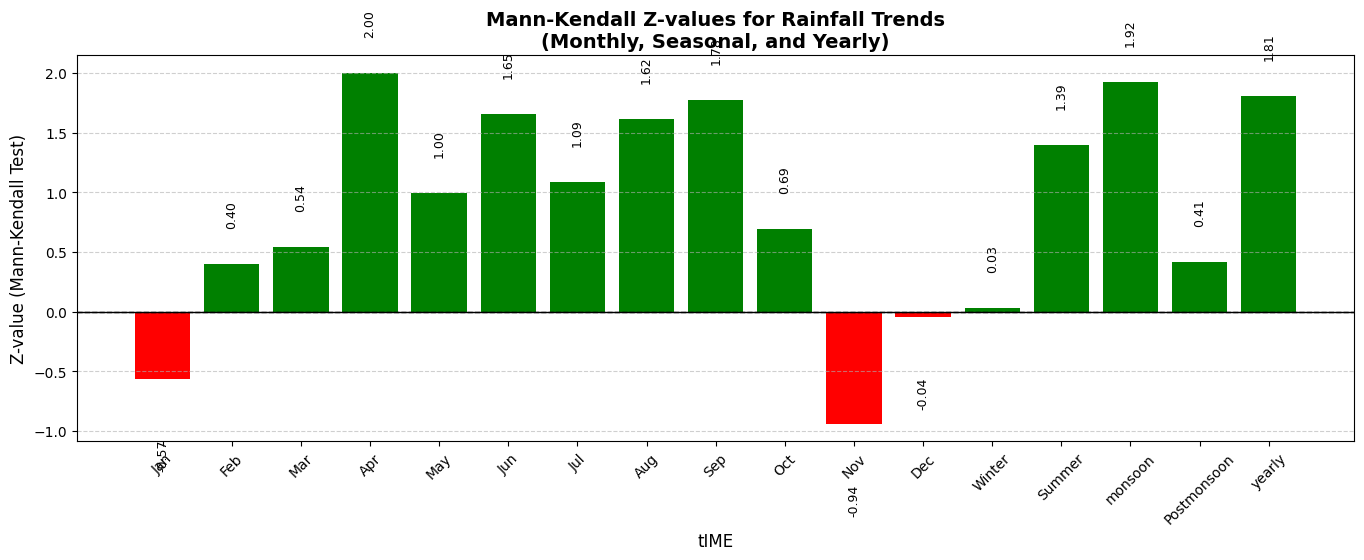

<ipython-input-17-2066dfcc4ad8>:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


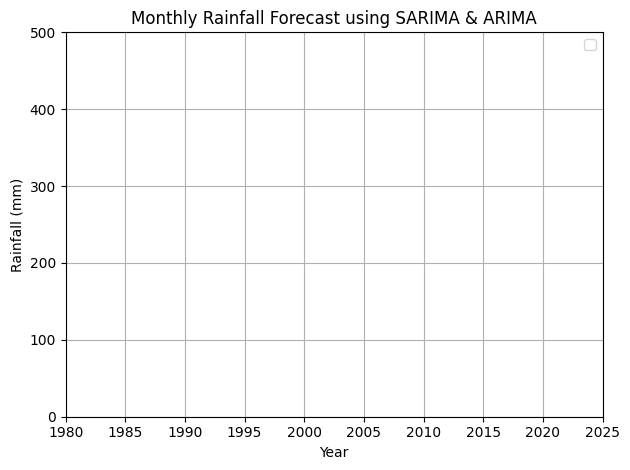

In [17]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Jhunjhunu.xlsx'
df = pd.read_excel(file_path)

# Define column groups
monthly_cols = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_cols = ['Winter', 'Summer', 'monsoon', 'Postmonsoon']
yearly_col = ['yearly']

# Store results
labels = []
z_values = []

def collect_z(col_list):
    for col in col_list:
        try:
            result = mk.original_test(df[col])
            labels.append(col)
            z_values.append(result.z)
        except:
            labels.append(col)
            z_values.append(0)

# Collect all z-values
collect_z(monthly_cols)
collect_z(seasonal_cols)
collect_z(yearly_col)

# Create DataFrame for plotting
results_df = pd.DataFrame({'Label': labels, 'Z_value': z_values})

# Assign bar colors
results_df['Color'] = ['green' if z >= 0 else 'red' for z in results_df['Z_value']]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(results_df['Label'], results_df['Z_value'], color=results_df['Color'])

# Draw horizontal axis line at Z=0
plt.axhline(0, color='black', linewidth=1)

# Add Z-value labels on top of each bar
for bar, z in zip(bars, results_df['Z_value']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.3 if height >= 0 else height - 0.5,
             f"{z:.2f}", ha='center', va='bottom' if height >= 0 else 'top',
             fontsize=9, color='black', rotation=90)

# Axis labels and title
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("tIME", fontsize=12)
plt.ylabel("Z-value (Mann-Kendall Test)", fontsize=12)
plt.title("Mann-Kendall Z-values for Rainfall Trends\n(Monthly, Seasonal, and Yearly)", fontsize=14, fontweight='bold')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout(pad=2)

# Axis labels and title
#plt.xticks(rotation=45)
#plt.ylabel("Z-value (Mann-Kendall Test)")
#plt.title("Mann-Kendall Z-values for Rainfall Trends\n(Monthly, Seasonal, Yearly)")
#plt.grid(True, axis='y', linestyle='--', alpha=0.6)
#plt.tight_layout()

# Save plot
plt.savefig("Z_Trend_Barplot_Jhunjhunu.png", dpi=300)
plt.show()

